In [24]:
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import optuna
from skopt import BayesSearchCV
pd.set_option('display.max_columns', None)

In [ ]:
training_df=pd.read_csv("../Datasets/training_df_raw.csv")
training_df.fillna(0,inplace=True)
training_df.drop(['date','time'],axis=1,inplace=True)
training_df.head()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,fire
0,10.4600,95.42882,9.7600,9.326071,0.0,0.0,0.0,0.0,0.0,1012.4,1012.03436,3.9,4.0,0.0,1.0,0.0,0.057978,7.421590,12.229406,112.833694,137.38599,11.879999,10.7600,13.110001,14.0100,21.910000,0.275,0.318,0.195,0.026,1
1,10.4535,95.42859,9.7535,9.317741,0.0,0.0,0.0,0.0,0.0,1012.4,1011.91230,3.9,4.0,0.0,1.0,0.0,0.057956,7.421590,12.229406,112.833694,137.38599,11.879999,10.7535,13.103500,14.0035,21.903500,0.275,0.318,0.195,0.026,1
2,10.4145,95.42721,9.7145,9.267784,0.0,0.0,0.0,0.0,0.0,1012.4,1011.18120,3.9,4.0,0.0,1.0,0.0,0.057823,7.421590,12.229406,112.833694,137.38599,11.879999,10.7145,13.064501,13.9645,21.864500,0.275,0.318,0.195,0.026,1
3,9.2235,99.66392,9.1735,8.143780,0.0,0.0,0.0,0.0,0.0,1012.5,1010.78680,2.7,3.0,0.0,0.0,0.0,0.003924,5.937272,11.885453,75.963730,125.13428,13.320000,10.4235,12.823500,13.7235,21.923500,0.273,0.324,0.201,0.020,1
4,9.2430,99.66399,9.1930,8.168585,0.0,0.0,0.0,0.0,0.0,1012.5,1011.15370,2.7,3.0,0.0,0.0,0.0,0.003929,5.937272,11.885453,75.963730,125.13428,13.320000,10.4430,12.842999,13.7430,21.942999,0.273,0.324,0.201,0.020,1


In [3]:
training_df.shape

(113896, 31)

In [4]:
X=training_df.drop('fire',axis=1)
y=training_df['fire']

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.fit_transform(X_test)

In [7]:
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

In [8]:
xgb_cv_scores  = cross_val_score(xgb_model, X_train_transformed, y_train, cv=5, scoring='accuracy')

print("XGBoost Cross-Validation Scores: ", xgb_cv_scores)
print("XGBoost Mean Accuracy: ", np.mean(xgb_cv_scores))


XGBoost Cross-Validation Scores:  [0.82298068 0.82264172 0.82137958 0.82247709 0.82565988]
XGBoost Mean Accuracy:  0.823027789269771


In [9]:
xgb_model.fit(X_train_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [10]:
y_train_pred_xgb = xgb_model.predict(X_train_transformed)

train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')


Training Accuracy: 87.24%


Accuracy: 82.27%
Precision: 82.96%
Recall: 82.27%
F1 Score: 82.16%


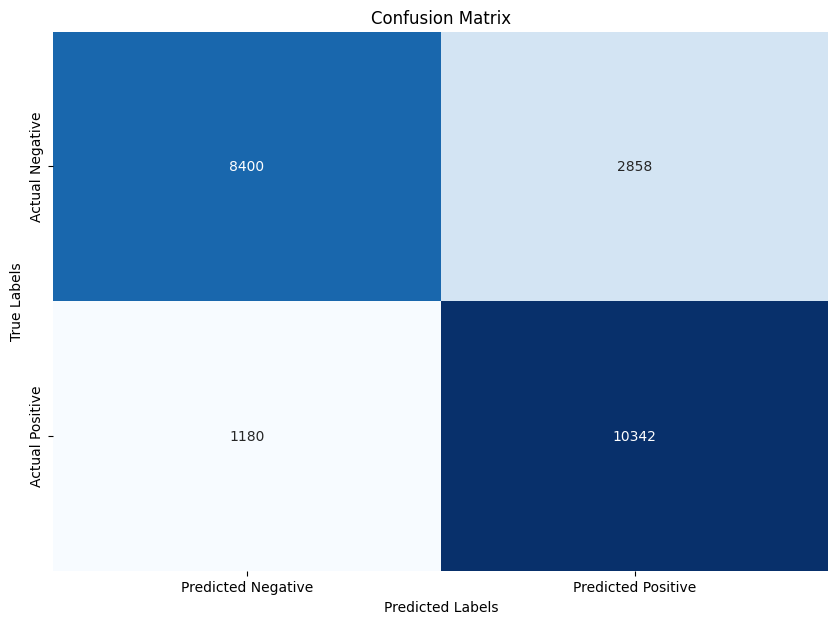

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81     11258
           1       0.78      0.90      0.84     11522

    accuracy                           0.82     22780
   macro avg       0.83      0.82      0.82     22780
weighted avg       0.83      0.82      0.82     22780



In [11]:
y_pred_xgb = xgb_model.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(y_test, y_pred_xgb, average='weighted')
recall = recall_score(y_test, y_pred_xgb, average='weighted')
f1 = f1_score(y_test, y_pred_xgb, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report for detailed metrics
class_report = classification_report(y_test, y_pred_xgb)
print('Classification Report:')
print(class_report)


In [13]:
xgb_model = xgb.XGBClassifier()

search_space_xgb = {
    'learning_rate': (0.01, 0.2),
    'n_estimators': (50, 500),
    'max_depth': (3, 10),
    'subsample': (0.6, 1.0)
}

bayes_search_xgb = BayesSearchCV(estimator=xgb_model, search_spaces=search_space_xgb, cv=5, n_jobs=-1, verbose=2)

bayes_search_xgb.fit(X_train_transformed, y_train)

print(f"Best parameters: {bayes_search_xgb.best_params_}")
print(f"Best cross-validation score: {bayes_search_xgb.best_score_}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [14]:
best_xgboost_model = xgb.XGBClassifier(
    learning_rate=bayes_search_xgb.best_params_['learning_rate'],
    max_depth=bayes_search_xgb.best_params_['max_depth'],
    n_estimators=bayes_search_xgb.best_params_['n_estimators'],
    subsample=bayes_search_xgb.best_params_['subsample'],
)

best_xgboost_model.fit(X_train_transformed, y_train)

y_train_pred_xgb = best_xgboost_model.predict(X_train_transformed)

train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')


Training Accuracy: 98.36%


Accuracy: 86.71%
Precision: 83.88%
Recall: 91.27%
F1 Score: 87.42%


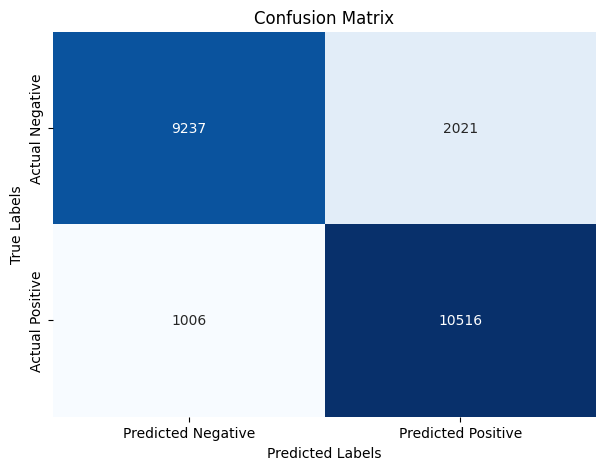

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     11258
           1       0.84      0.91      0.87     11522

    accuracy                           0.87     22780
   macro avg       0.87      0.87      0.87     22780
weighted avg       0.87      0.87      0.87     22780



In [15]:
y_pred_xgb = best_xgboost_model.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report for detailed metrics
class_report = classification_report(y_test, y_pred_xgb)
print('Classification Report:')
print(class_report)


In [16]:
importances = best_xgboost_model.feature_importances_
feature_names=X.columns
feature_imp_df = pd.DataFrame({'Feature': X.columns.tolist(), 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feature_imp_df

,Feature,Gini Importance
15,et0_fao_evapotranspiration,0.097927
23,soil_temperature_7_to_28cm,0.066962
22,soil_temperature_0_to_7cm,0.062603
13,cloud_cover_mid,0.049996
4,precipitation,0.046720
17,wind_speed_10m,0.041222
1,relative_humidity_2m,0.037683
10,surface_pressure,0.035717
26,soil_moisture_0_to_7cm,0.035385
18,wind_speed_100m,0.034554


In [17]:
y_scores = best_xgboost_model.predict_proba(X_test_transformed)[:, 1]

AUC-ROC Score: 0.9290525267934987


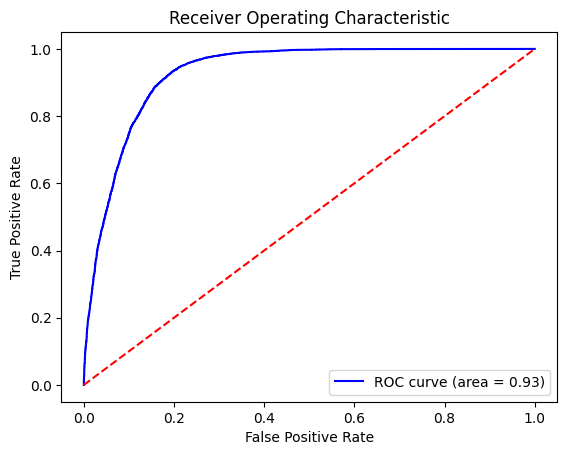

In [18]:
auc_score = roc_auc_score(y_test, y_scores)
print("AUC-ROC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()